# Sumário
<a id='sumario'></a>
- [sumario](#sumario)  
- [1 Carregando dados](#carregando)  
- [2 Tratando dados](#tratando)  
  - [2.1 Renomeando as colunas](#renomeando)  
  - [2.2 Verificado valores e tipos](#tipo)  
  - [2.3 Adicionando colunas](#adicionando)  
     - [2.3.1 coluna de data e hora](#datahora)  
     - [2.3.2 coluna para datas](#data)  

- [3  Análise de dados](#analisando)  
  - [3.1 quantidade de eventos](#qe)  
  - [3.2 quantidade de usuarios](#qu)  
  - [3.3 quantidade de eventos medio](#qem)  
  - [3.4 grafico por data](#graficodata)  
  - [3.5 conclusões sobre as datas](#cd)  
  - [3.6 filtrando datas](#filtrodata)  
  - [3.7 conclusões](#c1)  
  
- [4 Analisando o funil de eventos](#funil)  
    - [4.1 frequencia de eventos](#frequenciaevento)  
    - [4.2 usuarios por eventos](#frequenciaevento)  
    - [4.3 ordem de ações e funil](#ordemacao)  
    - [4.4 usuarios por etapas](#usuarioetapa)  
    - [4.5 conclusões](#c2)  
    
- [5 Analisando os resultados do experimento](#experimento)  
    - [usuarios por grupo](#ug)  
    - [testeA/A](#aa)  
      - [shapiro](#shap)  
      - [teste usuarios por evento](#tue)   
          - [teste estatistico evento mais popular](#tep)  
          - [teste estatistico universal](#teu)  
          - [conclusões sobre divisao dos grupos](#cdg)  
    - [testeA/B](#ab)  
      - [teste usuarios por evento](#tue2)   
      - [teste estatistico evento mais popular](#tep2)  
      - [teste estatistico universal](#teu2)  
      - [conclusões sobre divisao dos grupos](#cdg2)  
    - [redefinição estatistica](#re)  
    - [explicações e conclusões](#exp)  
      
  

[sumario](#sumario)
##  Carregando dados <a id= "carregando"> </a>


In [1]:
import pandas as pd
import numpy as np
import math as mth
from scipy import stats as st
import scipy.stats as stats
import datetime as dt
import matplotlib.pyplot as plt
import math

In [2]:
caminho1="/datasets/logs_exp_us.csv"
caminho2="C:/Users/Nair Corso/Documents/andre/DAnalise/10/logs_exp_us.csv"
try:
    df=pd.read_csv(caminho1, sep= '\t')
except:
    df=pd.read_csv(caminho2, sep= '\t')
#aparentemente cada dado era separado por espaço, mas era tab. o que é representado por /t

In [3]:
df

,EventName,DeviceIDHash,EventTimestamp,ExpId
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248
...,...,...,...,...
244121,MainScreenAppear,4599628364049201812,1565212345,247
244122,MainScreenAppear,5849806612437486590,1565212439,246
244123,MainScreenAppear,5746969938801999050,1565212483,246
244124,MainScreenAppear,5746969938801999050,1565212498,246


[sumario](#sumario)

## Tratando dados<a id= "tratando"> </a>

###  Renomeando as colunas <a id='renomeando'> </a>

In [4]:
df.columns=['nome','id','etc','grupo']


###  Verificado valores e tipos<a id='tipo'></a>

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   nome    244126 non-null  object
 1   id      244126 non-null  int64 
 2   etc     244126 non-null  int64 
 3   grupo   244126 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 7.5+ MB


In [6]:
df['dataHora'] = pd.to_datetime(df['etc'], utc=True, unit='s')


###  Adicionando colunas<a id='adicionando'></a>

####  coluna de data e hora<a id='datahora'></a>

In [7]:
df['hora']= df['dataHora'].dt.time

#### coluna para datas<a id='data'></a>

In [8]:
df['data']= df['dataHora'].dt.date

df.columns=['nome','id','ets','grupo', 'datahora','hora','data']


In [9]:
df=df.drop(columns='etc')


[sumario](#sumario)

##   Análise de dados <a id='sumario'></a>

### quantidade de eventos <a id='qe'></a> 

In [10]:
#Quantos eventos ficam nos diários? 
df['nome'].value_counts()
#resp. 5

nome
MainScreenAppear           119205
OffersScreenAppear          46825
CartScreenAppear            42731
PaymentScreenSuccessful     34313
Tutorial                     1052
Name: count, dtype: int64

### quantidade de usuarios <a id='qu'></a> 

In [11]:
df['id'].nunique()

7551

In [12]:
df.duplicated().count()

244126

### quantidade de eventos em media por usuario <a id='qem'></a>  

In [13]:
df['nome'].value_counts()/df['id'].nunique()

nome
MainScreenAppear           15.786651
OffersScreenAppear          6.201165
CartScreenAppear            5.658986
PaymentScreenSuccessful     4.544166
Tutorial                    0.139319
Name: count, dtype: float64

<font color= 'green'>temos que cada usuario aciona uma media de:  
15 vezes o evento tela principal, 6 vezes a ela de oferta, 5,6 a tela de carrinho e 4,5 a tela de pagamento realizado

In [14]:
df['nome'].count()/df['id'].nunique()

32.33028737915508

### grafico por data <a id='graficodata'></a>  

vamos verificar a vaiação temporal da coleta de dados:

In [15]:
df['data'].min(),
df['data'].max()

datetime.date(2019, 8, 7)

In [16]:
(df['data'].max())-(df['data'].min())

datetime.timedelta(days=13)

<font color = 'blue'>13 dias!  
agora vamos ver a distribuição em um grafico

(array([9.0000e+00, 3.1000e+01, 0.0000e+00, 5.5000e+01, 1.0500e+02,
        0.0000e+00, 1.8400e+02, 4.1300e+02, 0.0000e+00, 2.0310e+03,
        3.6229e+04, 0.0000e+00, 3.5606e+04, 3.3351e+04, 0.0000e+00,
        3.3033e+04, 3.6113e+04, 0.0000e+00, 3.5822e+04, 3.1144e+04]),
 array([18102.  , 18102.65, 18103.3 , 18103.95, 18104.6 , 18105.25,
        18105.9 , 18106.55, 18107.2 , 18107.85, 18108.5 , 18109.15,
        18109.8 , 18110.45, 18111.1 , 18111.75, 18112.4 , 18113.05,
        18113.7 , 18114.35, 18115.  ]),
 <BarContainer object of 20 artists>)

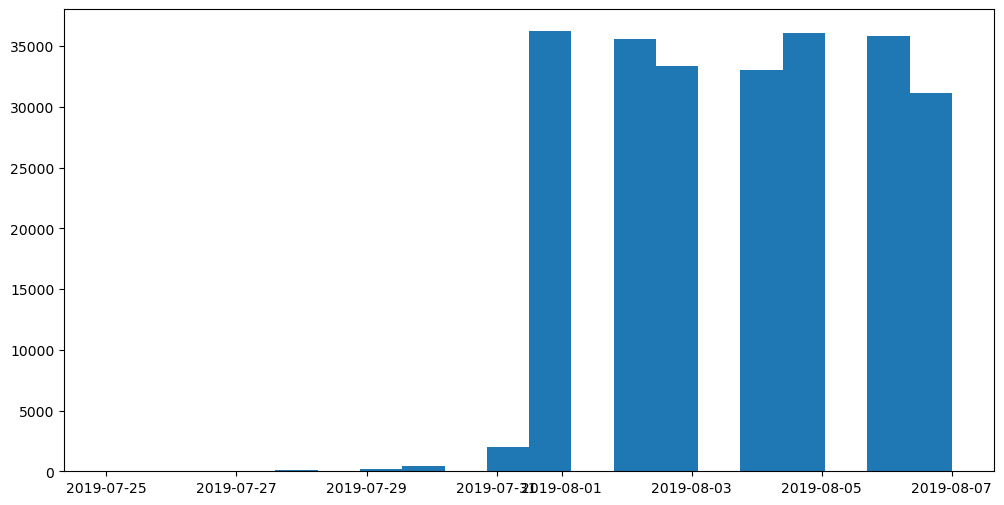

In [17]:
plt.figure(figsize=(12, 6))

# Plota o histograma
plt.hist(df['data'], bins=20)


### conclusões sobre as datas <a id='cd'></a>  

<font color='green'>

Surgiu um problema! os dados de antes de agosto são muito poucos, talvez os eventos desse periodo não tenham sido registrados, ou repassados inteiramente.

Assim, quase todos os dados são referentes ao mês 8, ou seja, agosto. Os poucos dados de julho podem até prejudicar a analise e compreenção da distribuição dos dados, portanto é interessante filtrar tudo para agosto apenas.

### filtrando datas<a id='filtrodata'></a> 

<font color= blue>
passo a passo: criaremos uma coluna com a diferença de dias entre a data minima e a data do dado, após isso passaremos a diferença de tempo em dias para um numero inteiro. faremos isso dividindo o dado de tempo por exatamente um dia. Isso é possível ao metodo timedelta, com argumento de 1 (quantidade) e D(unidade dia). Assim:  np.timedelta64(1,'D').  
após isso, passamos para o tipo inteiro e somamos 1 dia para trabalharmos com numeros ordinais (ex.:1º, 2º , 3º dia de coleta de dados)  
por fim filtraremos os dados apenas para os dias de agosto e reiniciaremos a contagem de dias considerando agora, o dia 1º/08/2019 como o primeiro dia.

In [18]:
df['dia']=df['data']-df['data'].min()
df['dia']=((df['dia']/np.timedelta64(1,'D')).round().astype('int'))+1

In [19]:
df

,nome,id,grupo,dataHora,hora,data,dia
0,MainScreenAppear,4575588528974610257,246,2019-07-25 04:43:36+00:00,04:43:36,2019-07-25,1
1,MainScreenAppear,7416695313311560658,246,2019-07-25 11:11:42+00:00,11:11:42,2019-07-25,1
2,PaymentScreenSuccessful,3518123091307005509,248,2019-07-25 11:28:47+00:00,11:28:47,2019-07-25,1
3,CartScreenAppear,3518123091307005509,248,2019-07-25 11:28:47+00:00,11:28:47,2019-07-25,1
4,PaymentScreenSuccessful,6217807653094995999,248,2019-07-25 11:48:42+00:00,11:48:42,2019-07-25,1
...,...,...,...,...,...,...,...
244121,MainScreenAppear,4599628364049201812,247,2019-08-07 21:12:25+00:00,21:12:25,2019-08-07,14
244122,MainScreenAppear,5849806612437486590,246,2019-08-07 21:13:59+00:00,21:13:59,2019-08-07,14
244123,MainScreenAppear,5746969938801999050,246,2019-08-07 21:14:43+00:00,21:14:43,2019-08-07,14
244124,MainScreenAppear,5746969938801999050,246,2019-08-07 21:14:58+00:00,21:14:58,2019-08-07,14


In [20]:
print(df.loc[df['dia']<=7,:'nome'].count())
dfFiltradaData=df.loc[df['dia']>=8,:]
dfFiltradaData

nome    2828
dtype: int64


,nome,id,grupo,dataHora,hora,data,dia
2828,Tutorial,3737462046622621720,246,2019-08-01 00:07:28+00:00,00:07:28,2019-08-01,8
2829,MainScreenAppear,3737462046622621720,246,2019-08-01 00:08:00+00:00,00:08:00,2019-08-01,8
2830,MainScreenAppear,3737462046622621720,246,2019-08-01 00:08:55+00:00,00:08:55,2019-08-01,8
2831,OffersScreenAppear,3737462046622621720,246,2019-08-01 00:08:58+00:00,00:08:58,2019-08-01,8
2832,MainScreenAppear,1433840883824088890,247,2019-08-01 00:08:59+00:00,00:08:59,2019-08-01,8
...,...,...,...,...,...,...,...
244121,MainScreenAppear,4599628364049201812,247,2019-08-07 21:12:25+00:00,21:12:25,2019-08-07,14
244122,MainScreenAppear,5849806612437486590,246,2019-08-07 21:13:59+00:00,21:13:59,2019-08-07,14
244123,MainScreenAppear,5746969938801999050,246,2019-08-07 21:14:43+00:00,21:14:43,2019-08-07,14
244124,MainScreenAppear,5746969938801999050,246,2019-08-07 21:14:58+00:00,21:14:58,2019-08-07,14


In [21]:
(2828/241298 )*100

1.1719947948180258

menos de 1,2 por cento dos dados são de antes de agosto

In [22]:
dfFiltradaData['dia'].unique()

array([ 8,  9, 10, 11, 12, 13, 14])

In [23]:
dfFiltradaData['dia']=dfFiltradaData['dia']-7

C:\Users\Nair Corso\AppData\Local\Temp\ipykernel_17816\1536201598.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFiltradaData['dia']=dfFiltradaData['dia']-7


In [24]:
dfFiltradaData['dia'].unique()

array([1, 2, 3, 4, 5, 6, 7])

(array([36229.,     0.,     0., 35606.,     0.,     0., 33351.,     0.,
            0.,     0., 33033.,     0.,     0., 36113.,     0.,     0.,
        35822.,     0.,     0., 31144.]),
 array([18109. , 18109.3, 18109.6, 18109.9, 18110.2, 18110.5, 18110.8,
        18111.1, 18111.4, 18111.7, 18112. , 18112.3, 18112.6, 18112.9,
        18113.2, 18113.5, 18113.8, 18114.1, 18114.4, 18114.7, 18115. ]),
 <BarContainer object of 20 artists>)

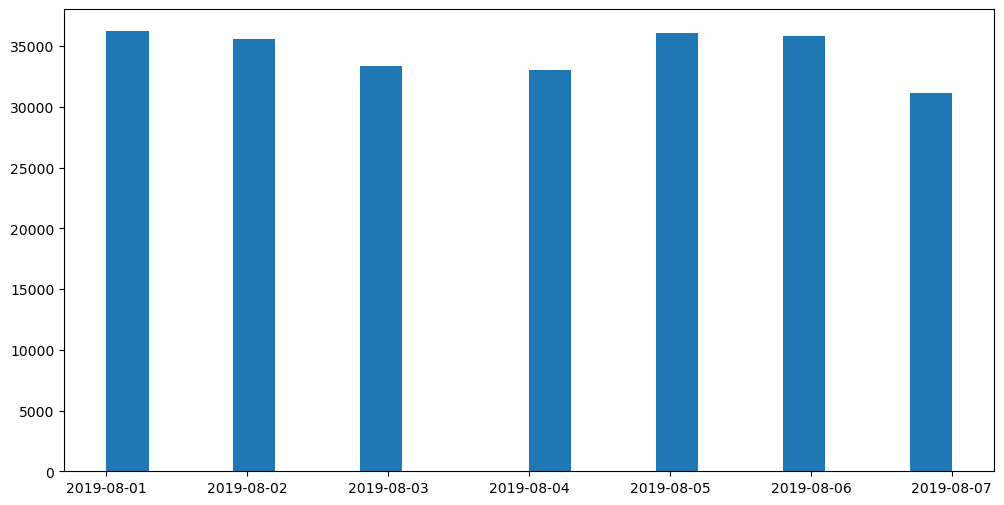

In [25]:

plt.figure(figsize=(12, 6))
plt.hist(dfFiltradaData['data'], bins=20)

### conclusões <a id='c1'></a>

<font color='green'>agora sim temos dados consistentes: é um periodo de tempo de apenas 7 dias entre 1 de agosto e 7 de agosto

[sumario](#sumario)

## Analisando o funil de eventos <a id="funil"> </a>

In [26]:
df

,nome,id,grupo,dataHora,hora,data,dia
0,MainScreenAppear,4575588528974610257,246,2019-07-25 04:43:36+00:00,04:43:36,2019-07-25,1
1,MainScreenAppear,7416695313311560658,246,2019-07-25 11:11:42+00:00,11:11:42,2019-07-25,1
2,PaymentScreenSuccessful,3518123091307005509,248,2019-07-25 11:28:47+00:00,11:28:47,2019-07-25,1
3,CartScreenAppear,3518123091307005509,248,2019-07-25 11:28:47+00:00,11:28:47,2019-07-25,1
4,PaymentScreenSuccessful,6217807653094995999,248,2019-07-25 11:48:42+00:00,11:48:42,2019-07-25,1
...,...,...,...,...,...,...,...
244121,MainScreenAppear,4599628364049201812,247,2019-08-07 21:12:25+00:00,21:12:25,2019-08-07,14
244122,MainScreenAppear,5849806612437486590,246,2019-08-07 21:13:59+00:00,21:13:59,2019-08-07,14
244123,MainScreenAppear,5746969938801999050,246,2019-08-07 21:14:43+00:00,21:14:43,2019-08-07,14
244124,MainScreenAppear,5746969938801999050,246,2019-08-07 21:14:58+00:00,21:14:58,2019-08-07,14


### frequencia de eventos <a id="funil"> </a>

In [27]:
df['nome'].value_counts()


nome
MainScreenAppear           119205
OffersScreenAppear          46825
CartScreenAppear            42731
PaymentScreenSuccessful     34313
Tutorial                     1052
Name: count, dtype: int64

### usuarios por eventos <a id="frequenciaevento"> </a>

In [28]:
eventoUsuario=df.groupby('nome').agg({'id':'nunique'}).reset_index()
eventoUsuario.sort_values(by='id', ascending=False)

,nome,id
1,MainScreenAppear,7439
2,OffersScreenAppear,4613
0,CartScreenAppear,3749
3,PaymentScreenSuccessful,3547
4,Tutorial,847


In [29]:
eventoUsuario['porporcao']= (eventoUsuario['id']/eventoUsuario['id'].sum()*100).round(2)
eventoUsuario=eventoUsuario.sort_values(by='id', ascending=False)
eventoUsuario

,nome,id,porporcao
1,MainScreenAppear,7439,36.84
2,OffersScreenAppear,4613,22.84
0,CartScreenAppear,3749,18.56
3,PaymentScreenSuccessful,3547,17.56
4,Tutorial,847,4.19


<font color=green> Claramente o funil ocorre nesta ordem :  
    <font color=blue>  MainScreenAppear, OffersScreenAppear, CartScreenAppear, PaymentScreenSuccessful <font color=green>  
    o evento tutorial esta apartado da sequencia de eventos e apenas uma pequena parela dos usuarios decidem passar pela referida etapa

para o funil usaremos um grafico especifico go.Funnel

### ordem de ações e funil <a id="frequenciaevento"> </a>

In [30]:
eventoTotal=df.groupby('nome').agg({'id':'count'}).reset_index()
eventoTotal=eventoTotal.sort_values(by='id', ascending=False)
print(eventoTotal)

                      nome      id
1         MainScreenAppear  119205
2       OffersScreenAppear   46825
0         CartScreenAppear   42731
3  PaymentScreenSuccessful   34313
4                 Tutorial    1052


In [31]:
eventoFunil1=eventoTotal[eventoTotal['nome']!='Tutorial']
print(eventoFunil1)

                      nome      id
1         MainScreenAppear  119205
2       OffersScreenAppear   46825
0         CartScreenAppear   42731
3  PaymentScreenSuccessful   34313


### usuarios por etapas <a id="ordemacao"> </a>

In [32]:
import plotly 
from plotly import graph_objects as go

fig = go.Figure(go.Funnel(
    y = eventoFunil1['nome'],
    x = eventoFunil1['id']
    ))
fig.show()

In [33]:
eventoFunil2=eventoUsuario[eventoUsuario['nome']!='Tutorial']
eventoFunil2

,nome,id,porporcao
1,MainScreenAppear,7439,36.84
2,OffersScreenAppear,4613,22.84
0,CartScreenAppear,3749,18.56
3,PaymentScreenSuccessful,3547,17.56


In [34]:

fig = go.Figure(go.Funnel(
    y = eventoFunil2['nome'],
    x = eventoFunil2['id']
    ))
fig.show()

### conclusões <a id="usuarioetapa"> </a>

<span style="background-color: lightgreen"> <font color=green> Perde-se muitos usuarios da primeira para a segunda fase,em outras palavras: muitos usuarios não chegam a abrir a tela da oferta, seja por não terem encontrado o que procuram, seja por algum outro motivo.  
    Ainda assim, temos que uma parcela de 47% do total de usuarios unicos chegam a finalizar pelo menos uma compra.   
    Quanto aos acessos totais, 28% se convertem em compras.

[sumario](#sumario)

##  Analisando os resultados do experimento <a id="experimento"> </a>

<font color='blue'>será que os grupos A1 e A2 são semelhantes? e o grupo B? teria alguma diferença estatisticamente relevante?  
hipotese nula: os grupos têm semelhantes comportamentos de usuarios 

###  usuarios por grupo <a id="ug"> </a>

In [35]:
df['grupo'].value_counts()

grupo
248    85747
246    80304
247    78075
Name: count, dtype: int64

In [36]:
df.groupby('grupo').agg({'id':'nunique'})

,id
grupo,
246,2489
247,2520
248,2542


In [37]:
80304/78075

1.0285494716618635

temos uma quantidade de usuarios muito similar entre os grupos, temos uma quantidade de  eventos similares entre os grupos AA (uma diferença de menos de 3%)

In [38]:
g246=df[df['grupo']== 246]
g247=df[df['grupo']== 247]
g248=df[df['grupo']== 248]

In [39]:
g248[g248['id'].isin(g246['id'])]
g247[g247['id'].isin(g246['id'])]
g248[g248['id'].isin(g247['id'])]

,nome,id,grupo,dataHora,hora,data,dia


###  testeA/A <a id="aa"> </a>

In [40]:
grupoA1=g246
grupoA2=g247
grupoB=g248

In [41]:
grupoA1['nome'].value_counts()

nome
MainScreenAppear           38281
OffersScreenAppear         14910
CartScreenAppear           14819
PaymentScreenSuccessful    11970
Tutorial                     324
Name: count, dtype: int64

In [42]:
grupoA2['nome'].value_counts()

nome
MainScreenAppear           39710
OffersScreenAppear         15344
CartScreenAppear           12570
PaymentScreenSuccessful    10101
Tutorial                     350
Name: count, dtype: int64

####  teste usuarios por evento <a id="tue"> </a>

In [43]:
#primeiro vamos agrupar os dados filtrados por evento: 
grupoA1funil=grupoA1.groupby('nome').agg({'id':'nunique'}).reset_index().sort_values(by='id', ascending=False)
grupoA2funil=grupoA2.groupby('nome').agg({'id':'nunique'}).reset_index().sort_values(by='id', ascending=False)
grupoBfunil=grupoB.groupby('nome').agg({'id':'nunique'}).reset_index().sort_values(by='id', ascending=False)


In [44]:
#aogra vamos extrair a quantidade total de usuarios e a quantidade de usuarios que ativaram o evento alvo para cada grupo:

#A1
#TOTAL
totalA1=len(grupoA1['id'].unique())
#EVENTO1
Ev1A1=grupoA1funil.loc[1,'id']
#EVENTO2
Ev2A1=grupoA1funil.loc[2,'id']
#EVENTO3
Ev3A1=grupoA1funil.loc[3,'id']
#EVENTO4
Ev4A1=grupoA1funil.loc[4,'id']

#A2
totalA2=len(grupoA2['id'].unique())
Ev1A2=grupoA2funil.loc[1,'id']
Ev2A2=grupoA2funil.loc[2,'id']
Ev3A2=grupoA2funil.loc[3,'id']
Ev4A2=grupoA2funil.loc[4,'id']

#B
totalB=len(grupoB['id'].unique())
Ev1B=grupoBfunil.loc[1,'id']
Ev2B=grupoBfunil.loc[2,'id']
Ev3B=grupoBfunil.loc[3,'id']
Ev4B=grupoBfunil.loc[4,'id']

<font color='blue'>
aogra criamos uma formula com o teste z_teste para testarmos as proporções entre as populações amostrais   
consideraremos alpha como 0.05 por padrão, ou seja estabelecemos uma margem máxima de 5% de chance de incorrer em erro do tipo 1 
, o que corresponderia a rejeitar a hipotese nula, sendo ela verdadeira.

In [45]:
print(grupoBfunil)

                      nome    id
1         MainScreenAppear  2501
2       OffersScreenAppear  1538
0         CartScreenAppear  1239
3  PaymentScreenSuccessful  1185
4                 Tutorial   282


In [46]:

def z_teste(successes1, successes2, trials1, trials2, alpha=0.05):
    p1 = successes1/trials1
    p2 = successes2/trials2
    p_combined = (successes1 + successes2) / (trials1 + trials2)

    difference = p1 - p2
    
    distr = stats.norm(0, 1) 

    z_value = difference / math.sqrt(p_combined * (1 - p_combined) * (1/trials1 + 1/trials2))
    p_value = (1 - distr.cdf(abs(z_value))) * 2

    print('p-value: ', p_value)
    if (p_value < alpha):
        print("Rejeitamos a hipotese nula: existe diferença estatistica significante")
    else:
        print("Não foi possível rejeitar a hipótese nula, não há motivo para considerar as proporções diferentes.")  

In [47]:
#agora é só chamar a função com os parametros desejados:

#####  teste estatistico evento mais popular <a id="tep"> </a>

In [48]:
#teste A/A
z_teste(Ev1A1,Ev1A2,totalA1,totalA2)

p-value:  0.5856639791209877
Não foi possível rejeitar a hipótese nula, não há motivo para considerar as proporções diferentes.


#####  teste estatistico universal <a id="teu"> </a>

In [49]:
z_teste(Ev2A1,Ev2A2,totalA1,totalA2)
z_teste(Ev3A1,Ev3A2,totalA1,totalA2)
z_teste(Ev4A1,Ev4A2,totalA1,totalA2)

p-value:  0.3233225048227193
Não foi possível rejeitar a hipótese nula, não há motivo para considerar as proporções diferentes.
p-value:  0.10902546202332886
Não foi possível rejeitar a hipótese nula, não há motivo para considerar as proporções diferentes.
p-value:  0.8756574258016974
Não foi possível rejeitar a hipótese nula, não há motivo para considerar as proporções diferentes.



<font color='green'>
os grupos foram corretamente divididos.

###  testeA/B <a id="ab"> </a>

####  teste estatistico evento mais popular <a id="tep2"> </a>

In [50]:
#teste A/B
z_teste(Ev1B,Ev1A1,totalB,totalA1)
z_teste(Ev1B,Ev1A2,totalB,totalA2)


p-value:  0.39774960182882513
Não foi possível rejeitar a hipótese nula, não há motivo para considerar as proporções diferentes.
p-value:  0.7632160970326178
Não foi possível rejeitar a hipótese nula, não há motivo para considerar as proporções diferentes.


####  teste estatistico universal <a id="teu2"> </a>

In [51]:
#A1
z_teste(Ev2B,Ev2A1,totalB,totalA1)
z_teste(Ev3B,Ev3A1,totalB,totalA1)
z_teste(Ev4B,Ev4A1,totalB,totalA1)

p-value:  0.2531656758489338
Não foi possível rejeitar a hipótese nula, não há motivo para considerar as proporções diferentes.
p-value:  0.23403912852637143
Não foi possível rejeitar a hipótese nula, não há motivo para considerar as proporções diferentes.
p-value:  0.8962914725257976
Não foi possível rejeitar a hipótese nula, não há motivo para considerar as proporções diferentes.


In [52]:
#A2
z_teste(Ev2B,Ev2A2,totalB,totalA2)
z_teste(Ev3B,Ev3A2,totalB,totalA2)
z_teste(Ev4B,Ev4A2,totalB,totalA2)

p-value:  0.878057445632423
Não foi possível rejeitar a hipótese nula, não há motivo para considerar as proporções diferentes.
p-value:  0.6763830984465451
Não foi possível rejeitar a hipótese nula, não há motivo para considerar as proporções diferentes.
p-value:  0.773300249936147
Não foi possível rejeitar a hipótese nula, não há motivo para considerar as proporções diferentes.


####  conclusões sobre divisao dos grupos <a id="cdg2"> </a>

<font color='green'>ao que parece os grupos foram muito bem divididos, com tamanhos semelhantes, entretanto não se encontrou diferença estatistica entre qualquer deles

###  redefinição estatistica <a id="re"> </a>

<font color ='blue'>bom, usamos muitas comparações nos nossos testes, o que torna maiores as chances de encontrar erros do tipo1, em razão disso, poderá ser necessário reajustar nosso alpha, dentre muitos outros, temos dois metodos famosos de correção:


Correção de Bonferroni

<font color = "darkgreen">pcorrigido = poriginal ÷k</font>

k é o número total de comparações.




O método de Šidák:  
pcorrigido=1−(1−poriginal)^1/m  
m é o número total de comparações.


usarei o de Bonferroni, portanto primeiramente calculamos quantas comparações foram feitas: 12!   
4 entre A1 e A2; 4 entre B e A1 e o resto entre B e A2   
após, estimamos quanto será e significancia final almejada: 0.1 ou 10%
por fim calculamos quanto será corrigido
pcorrigido= 1-(1-0.1)^1/12
agora é só rodar o calculo e apanhar o resultado

In [53]:
pcorrigido= 1-(1-0.1)**(1/12)
pcorrigido

0.008741610954696721

[sumario](#sumario)

###  explicações e conclusões <a id="exp"> </a>

 <font color= 'green'>Para evitarmos erros do tipo I deveriamos usar alpha em 0.008 ou seja 0.8%   
entretanto como não rejeitamos a hipotese nula nenhuma vez com o alpha maior, ao usarmos o alpha menor, obteremos o mesmo resultado, portanto a conclusão é de que **não há variação estatisticamente significante entre as amostras**